<a href="https://colab.research.google.com/github/naenumtou/statisticalModel/blob/main/ARIMAModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Set auto reload
%reload_ext autoreload
%autoreload 2

In [2]:
# To using Yahoo finance instead of pandas datareader
!pip install yfinance --upgrade --no-cache-dir

In [3]:
# Import libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import warnings

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.stattools import pacf, acf
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

# Config display
%config InlineBackend.figure_format = 'retina'
warnings.filterwarnings('ignore') #Off warnings

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
# Get stock data from API
df = yf.download(
    'AOT.BK',
    start = '2012-01-01',
    end = '2020-04-03'
)

# Get only close price
df = df[['Close']]
df.head(5)

[*********************100%***********************]  1 of 1 completed


,Close
Date,
2012-01-04,4.700
2012-01-05,4.800
2012-01-06,4.925
2012-01-09,5.050
2012-01-10,4.950


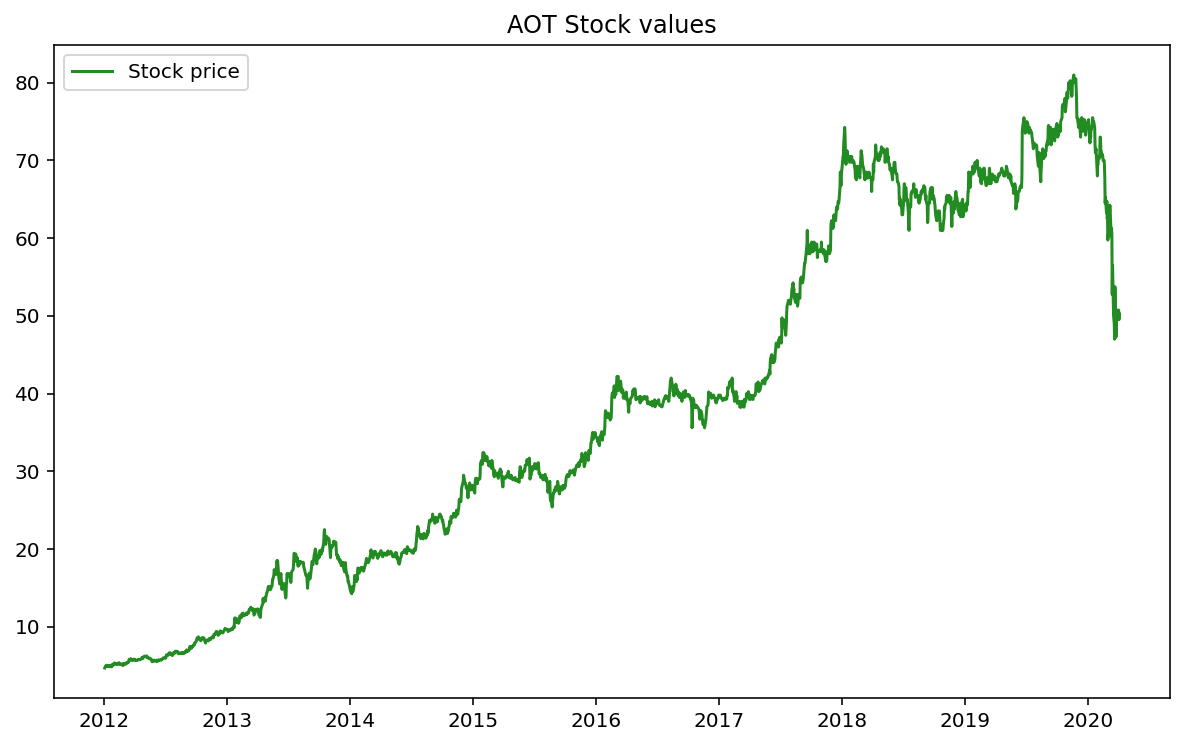

In [5]:
# Plot stock price data
plt.figure(figsize = (10, 6))
with plt.style.context('seaborn-deep'):
  plt.plot(
      df['Close'],
      c = 'forestgreen',
      label = 'Stock price'
  )
  plt.title('AOT Stock values')
  plt.legend(frameon = True, facecolor = 'white')
plt.show()

In [6]:
# Find the Integrated (d)
adf_res = adfuller(df['Close'], autolag = 'AIC')
print(f'p-Values: {adf_res[1]:.4f}') #Unit root (Non-stationary)

p-Values: 0.5593


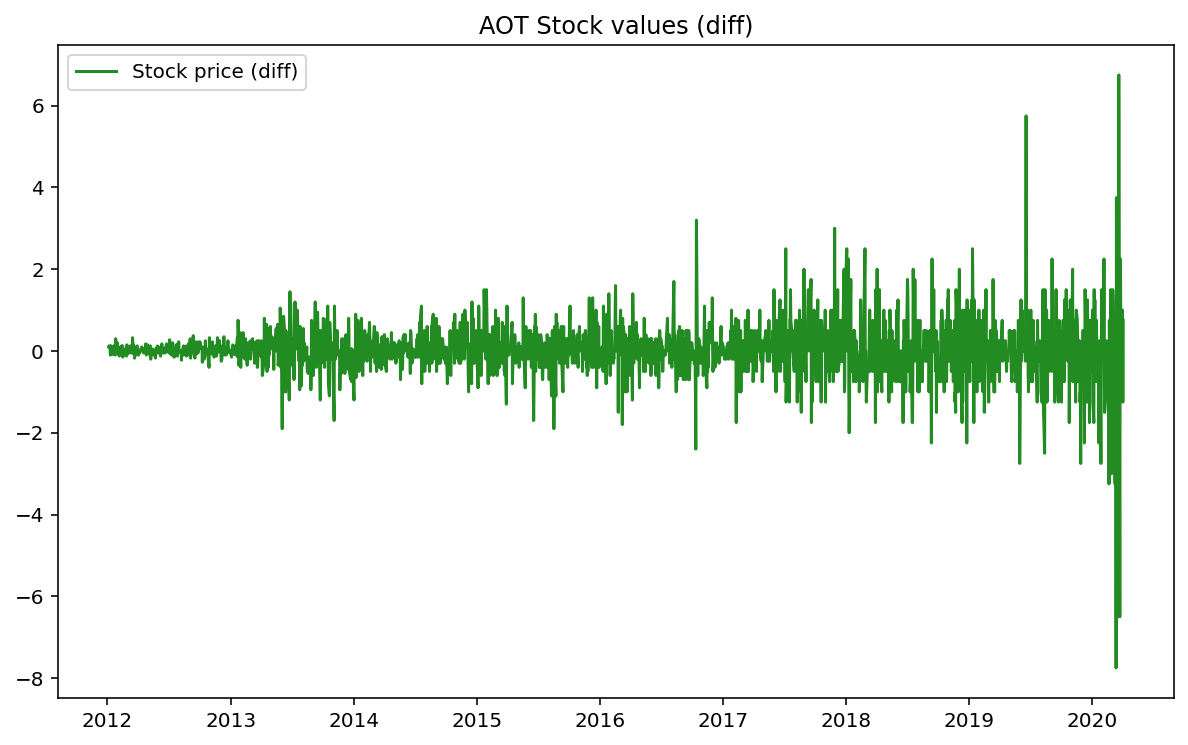

In [7]:
# First difference
df['Close_diff'] = df['Close'].diff(1)

# Plot stock price difference
plt.figure(figsize = (10, 6))
with plt.style.context('seaborn-deep'):
  plt.plot(
      df['Close_diff'],
      c = 'forestgreen',
      label = 'Stock price (diff)'
  )
  plt.title('AOT Stock values (diff)')
  plt.legend(frameon = True, facecolor = 'white')
plt.show()

In [8]:
# Test for stationary for difference
adf_res = adfuller(df['Close_diff'].dropna(), autolag = 'AIC')
print(f'p-Values: {adf_res[1]:.4f}') #Stationary

p-Values: 0.0000


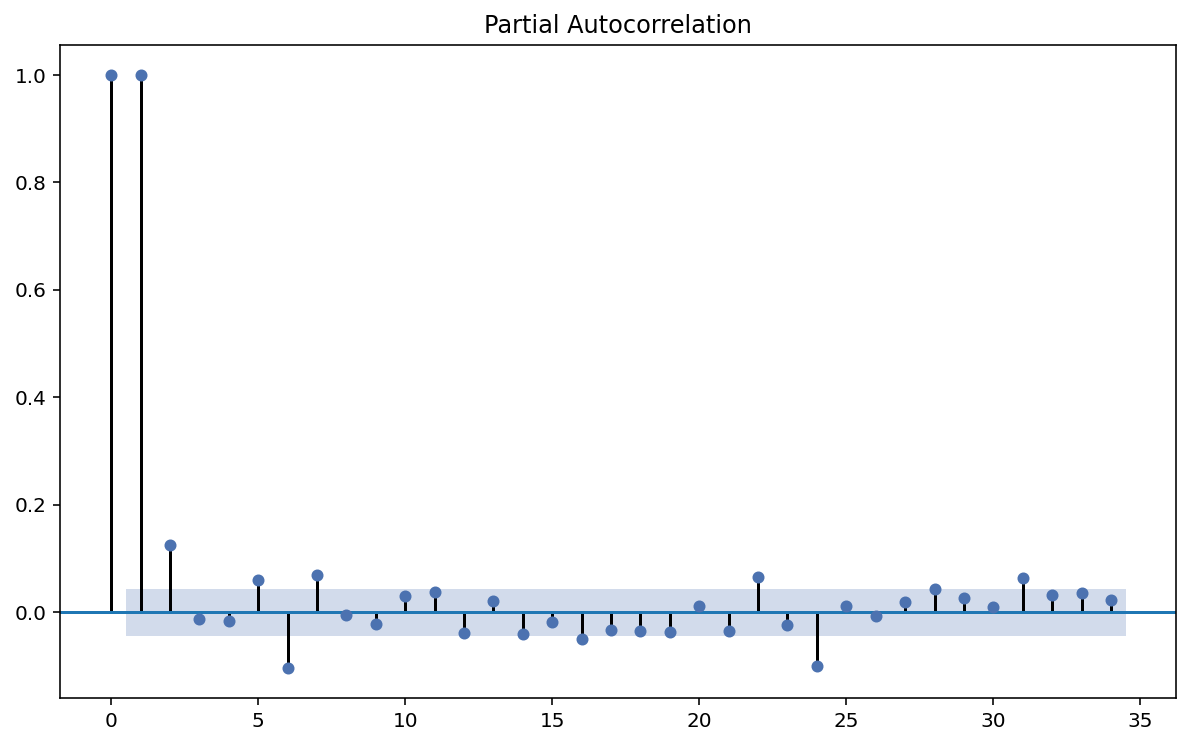

In [9]:
# Find the Auto Regressive (p)
# Plot partial autocorrelation
with plt.style.context('seaborn-deep'):
  plt.rc('figure', figsize = (10, 6))
  plot_pacf(
      df['Close'],
      method = 'ols'
  )
plt.show()

In [10]:
# Create pacf to DataFrame
df_pacf = pacf(df['Close'], method = 'ols')

# Find the 'p'
for i in range(0, len(df_pacf)):
  if df_pacf[i] < 1.96 / np.sqrt(len(df['Close'])):
    print(f'p = {i - 1}')
    break

p = 2


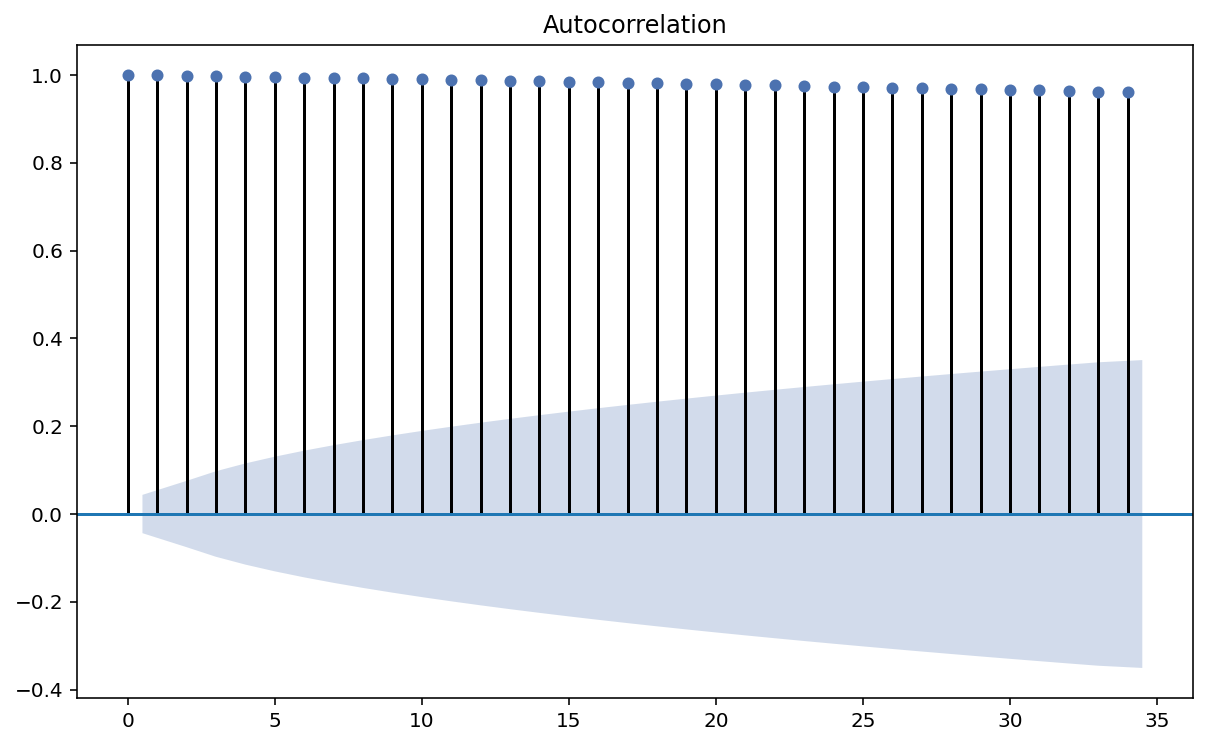

In [11]:
# Find the Moving Average (q)
# Plot autocorrelation
with plt.style.context('seaborn-deep'):
  plt.rc('figure', figsize = (10, 6))
  plot_acf(
      df['Close'],
      fft = True
  )
plt.show()

In [12]:
# Create pacf to DataFrame
df_acf = acf(df['Close'], fft = True)

# Find the 'q'
for i in range(0, len(df_acf)):
  if df_acf[i] < 1.96 / np.sqrt(len(df['Close'])):
    print(f'q = {i - 1}')
  else:
    print('Cannot be found')
    break

Cannot be found


In [13]:
# Test order
p = range(2, 3) #2
d = range(1, 2) #1
q = range(0, 3) #Unknown
pdq = list(itertools.product(p, d, q))
print(f'Possible of q: {pdq}')

Possible of q: [(2, 1, 0), (2, 1, 1), (2, 1, 2)]


In [14]:
# Test order fitting with ARIMA Model
for param in pdq:
  try:
    model = ARIMA(
        df['Close'].dropna(),
        order = param
    ).fit()
    print(f'Order: {param}')
    print(f'AIC: {model.aic:.4f}')
  except:
    continue

Order: (2, 1, 0)
AIC: 4304.3248
Order: (2, 1, 1)
AIC: 4292.5258
Order: (2, 1, 2)
AIC: 4275.7392


In [15]:
# Test all order
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))

for param in pdq:
  try:
    model = ARIMA(
        df['Close'].dropna(),
        order = param
    ).fit()
    print(f'Order: {param}')
    print(f'AIC: {model.aic:.4f}')
  except:
    continue

Order: (0, 0, 0)
AIC: 18326.4484
Order: (0, 0, 1)
AIC: 15612.3328
Order: (0, 0, 2)
AIC: 13338.1035
Order: (0, 1, 0)
AIC: 4332.2612
Order: (0, 1, 1)
AIC: 4304.0114
Order: (0, 1, 2)
AIC: 4304.1397
Order: (0, 2, 0)
AIC: 5965.5708
Order: (0, 2, 1)
AIC: 4339.3332
Order: (1, 0, 0)
AIC: 4344.9827
Order: (1, 0, 1)
AIC: 4317.4533
Order: (1, 0, 2)
AIC: 4317.3964
Order: (1, 1, 0)
AIC: 4302.6840
Order: (1, 1, 1)
AIC: 4304.4175
Order: (1, 1, 2)
AIC: 4297.8888
Order: (1, 2, 0)
AIC: 5181.9951
Order: (1, 2, 1)
AIC: 4307.6672
Order: (2, 0, 0)
AIC: 4316.0706
Order: (2, 0, 1)
AIC: 4317.7506
Order: (2, 0, 2)
AIC: 4311.4042
Order: (2, 1, 0)
AIC: 4304.3248
Order: (2, 1, 1)
AIC: 4292.5258
Order: (2, 1, 2)
AIC: 4275.7392
Order: (2, 2, 0)
AIC: 4897.4863
Order: (2, 2, 1)
AIC: 4309.5907
Order: (2, 2, 2)
AIC: 4296.8013


In [16]:
# ARIMA Model with order (2, 1, 2), the lowest AIC
model = ARIMA(
    df['Close'],
    order = (2, 1, 2)
).fit()
print(model.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 2018
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -2131.870
Method:                       css-mle   S.D. of innovations              0.696
Date:                Thu, 20 Jan 2022   AIC                           4275.739
Time:                        08:43:53   BIC                           4309.398
Sample:                             1   HQIC                          4288.093
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0227      0.015      1.558      0.119      -0.006       0.051
ar.L1.D.Close    -1.4143      0.060    -23.577      0.000      -1.532      -1.297
ar.L2.D.Close    -0.8197      0.062    -

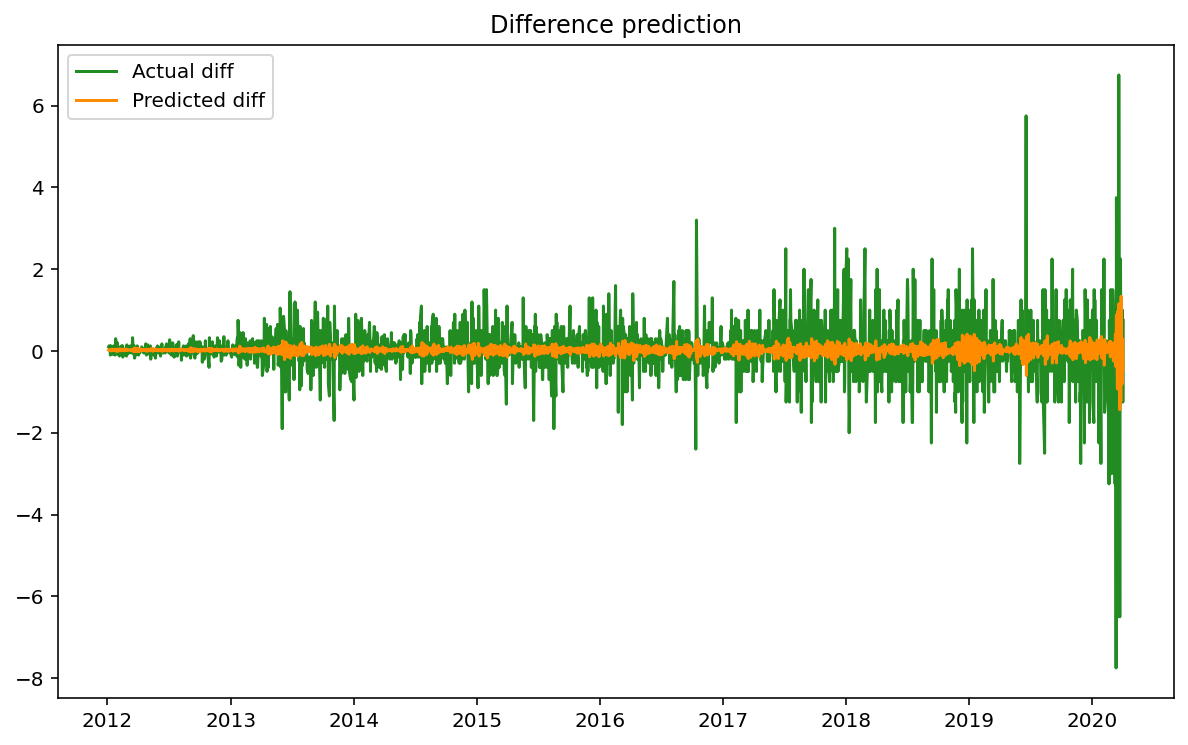

In [17]:
# Prediction
plt.figure(figsize = (10, 6))
with plt.style.context('seaborn-deep'):
  plt.plot(
      df['Close_diff'],
      c = 'forestgreen',
      label = 'Actual diff'
  )
  plt.plot(
      model.predict(),
      c = 'darkorange',
      label = 'Predicted diff'
  )
  plt.title('Difference prediction')
  plt.legend(frameon = True, facecolor = 'white')
plt.show()

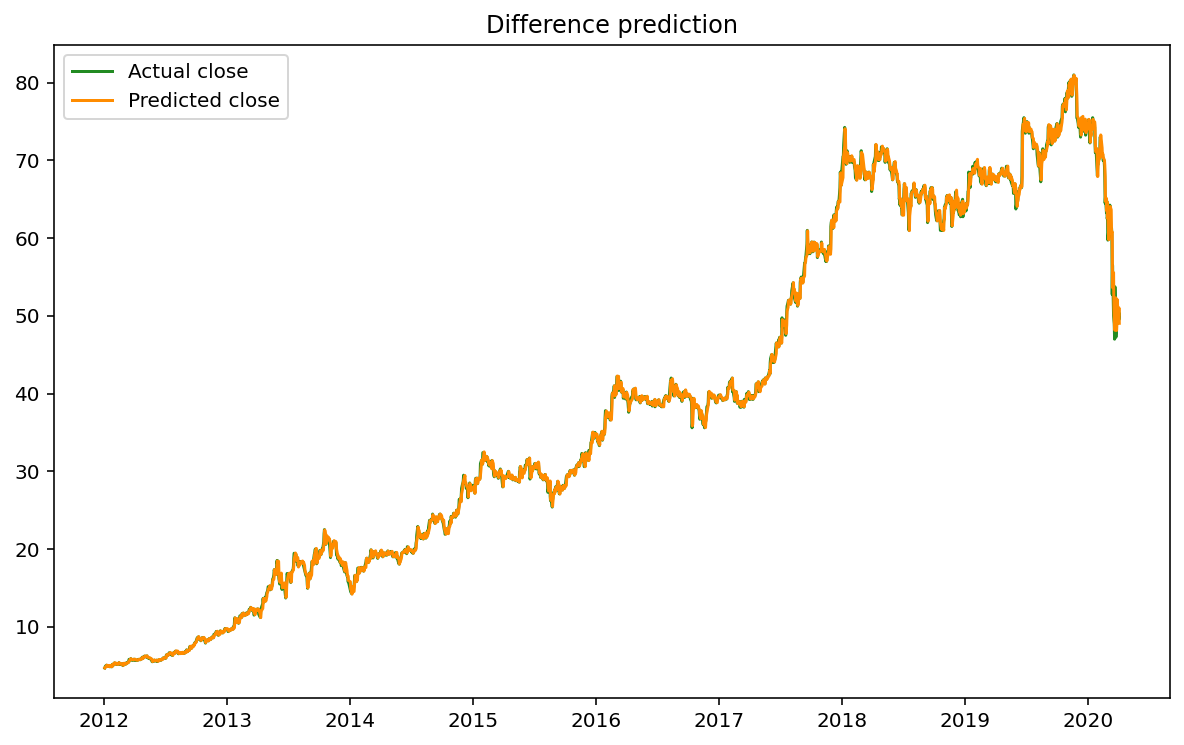

In [18]:
# Inverse prediction
prediction = pd.DataFrame(
    model.predict(),
    columns = ['Predicted']
)

# Mapping with raw table
df_pred = pd.merge(
    df,
    prediction,
    how = 'left',
    left_index = True,
    right_index = True
)
df_pred['Predicted_close'] = df_pred['Close'] + df_pred['Predicted'].shift(-1)
df_pred['Predicted_close'] = df_pred['Predicted_close'].shift(1).fillna(df['Close'])

# Plot
plt.figure(figsize = (10, 6))
with plt.style.context('seaborn-deep'):
  plt.plot(
      df_pred['Close'],
      c = 'forestgreen',
      label = 'Actual close'
  )
  plt.plot(
      df_pred['Predicted_close'],
      c = 'darkorange',
      label = 'Predicted close'
  )
  plt.title('Difference prediction')
  plt.legend(frameon = True, facecolor = 'white')
plt.show()

In [19]:
# Model performance
modelMSE = mean_squared_error(df_pred['Close'], df_pred['Predicted_close'])
print(f'MSE: {modelMSE:.4f}')

MSE: 0.4840
